In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("mushroom.csv")
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [4]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
# checking th null value

data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
# changing the data to numeric values

#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#labelencoder=LabelEncoder()
#for column in data.columns:
#    data[column] = labelencoder.fit_transform(data[column])

In [7]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
for val in list:
    data[val]=le.fit_transform(data[val].astype(str))

In [9]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [10]:
# dropping the above column as all values are 0 means same dont have any contribution in prediction

data=data.drop(["veil-type"],axis=1)


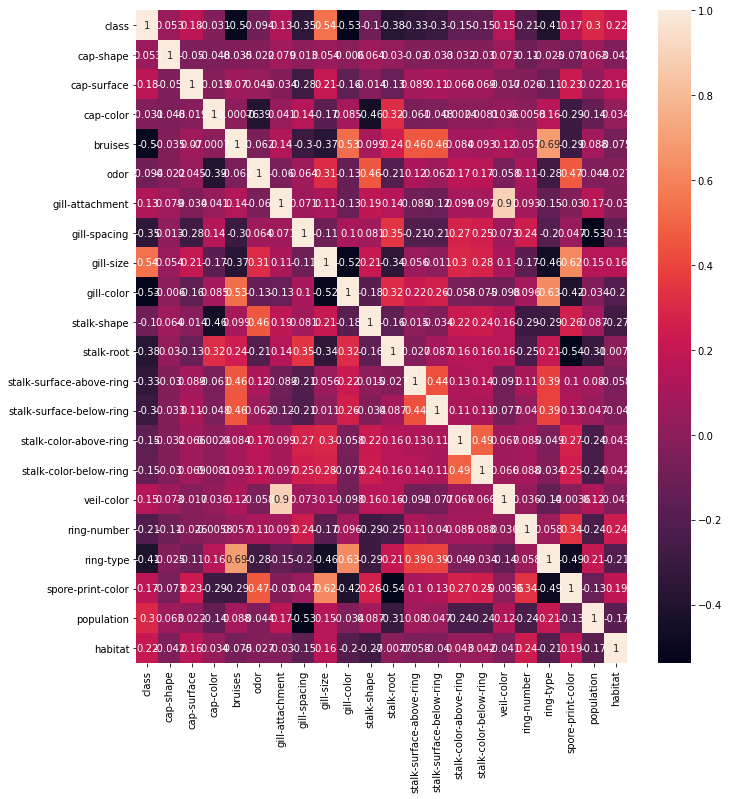

In [12]:
# correalation between the variables
import seaborn as sns
corr_hmap=data.corr()
plt.figure(figsize=(11,12))
sns.heatmap(corr_hmap,annot=True)
plt.show()


In [13]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(data))
data_new=data.loc[(z<3).all(axis=1)]

In [14]:
print(data.shape)
print(data_new.shape)

(8124, 22)
(6568, 22)


In [16]:
data=data_new
data.shape

(6568, 22)

In [17]:
# checking the skewness
data.skew()

class                       0.124508
cap-shape                  -0.234646
cap-surface                -0.630373
cap-color                   0.811934
bruises                     0.124508
odor                       -0.172451
gill-attachment             0.000000
gill-spacing                1.910296
gill-size                   0.489136
gill-color                  0.048010
stalk-shape                -0.881319
stalk-root                  0.777382
stalk-surface-above-ring   -1.381335
stalk-surface-below-ring   -0.989929
stalk-color-above-ring     -1.776145
stalk-color-below-ring     -1.681096
veil-color                  0.000000
ring-number                 0.000000
ring-type                  -0.231353
spore-print-color           0.697445
population                 -1.737467
habitat                     0.987162
dtype: float64

In [19]:
# treating skewness using log

for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [20]:
data.skew()

class                       0.124508
cap-shape                  -0.234646
cap-surface                -0.630373
cap-color                  -0.159359
bruises                     0.124508
odor                       -0.172451
gill-attachment             0.000000
gill-spacing                1.910296
gill-size                   0.489136
gill-color                  0.048010
stalk-shape                -0.881319
stalk-root                  0.027954
stalk-surface-above-ring   -1.381335
stalk-surface-below-ring   -0.989929
stalk-color-above-ring     -1.776145
stalk-color-below-ring     -1.681096
veil-color                  0.000000
ring-number                 0.000000
ring-type                  -0.231353
spore-print-color           0.266952
population                 -1.737467
habitat                     0.434502
dtype: float64

In [22]:
#splitting the data for training and test
data1=data.drop(columns=['class'])
x=data1
y=data['class']

In [23]:
x.shape

(6568, 21)

In [24]:
y.shape

(6568,)

In [25]:
max_score=0

for r_state in range(37,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(y_test,pred)
    if score>max_score:
        max_score=score
        final_r_state=r_state
print("Maximimum Accuracy Score is",max_score,'at',final_r_state)

Maximimum Accuracy Score is 0.9695501730103806 at 65


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=65)

In [27]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("accuracy score",accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

accuracy score 0.9903114186851211
[[782   4]
 [ 10 649]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       786
           1       0.99      0.98      0.99       659

    accuracy                           0.99      1445
   macro avg       0.99      0.99      0.99      1445
weighted avg       0.99      0.99      0.99      1445



In [28]:
# cross validation

from sklearn.model_selection import cross_val_score

svcscores=cross_val_score(svc,x,y,cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.68645358 0.9543379  0.95738204 1.         0.926885  ]
0.9050117024347324 0.11175383469049908


In [29]:
# saving the svc model

import joblib
joblib.dump(svc,'mushroom.obj')

['mushroom.obj']